<a href="https://colab.research.google.com/github/pablogrp/Normativa_OpenData/blob/main/CSVParser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prototipo Colab para analizar fuentes de datos abiertas

## Índice
- Fuentes de datos abiertos utilizados.
- Licencia de los datos utilizados.
- Objetivos del cuaderno. Indicar qué hipótesis se pretende observar / analizar.
- Análisis exploratorio de datos.
- Conclusiones del trabajo indicando si la hipótesis / análisis se cumple.
- Opinión de la importancia de los datos abiertos.

## 1. Fuentes de datos abiertos utilizados
Los DataSets utilizados en este estudio fueron adquiridados a través de la página principal datos abiertos de España, cuyo enlace es el siguiente: [datos.gob.es](https://datos.gob.es).

El tema principal de mi investigación es comprobar el consumo de alcohol (separado por rangos) con los accidentes de tráfico con víctimas mortales en Canarias. Tras una investigación sobre posibles datos abiertos que utilizar pude encontrar 2 que se adecúan bastante con mi idea principal. Los siguientes enlaces llevan a los datasets utilizados en la elaboración de la práctica:

- **Enlace alcohol:**  
  [Consumo de alcohol en Canarias](https://datos.gob.es/es/catalogo/a05003423-poblacion-de-16-y-mas-anos-que-bebe-alcohol-al-menos-1-vez-a-la-semana-segun-edad-de-inicio-del-consumo-de-alcohol-islas-de-canarias-2021)

- **Enlace tráfico:**  
  [Defunciones por accidentes de tráfico en Canarias](https://datos.gob.es/es/catalogo/ea0010587-canarias-defunciones-por-provincia-de-residencia-causas-lista-reducida-sexo-y-edad-ecm-identificador-api-tpx-sociedad_2589-salud_2590-edcm_2591-a2022_10365-l0-02006-px)

## 2. Licencias de los datos
- **Licencia alcohol:** [Gobierno de Canarias - Aviso Legal](http://www.gobiernodecanarias.org/istac/aviso_legal.html)
- **Licencia tráfico:** [INE - Aviso Legal]( https://www.ine.es/aviso_legal)

## 3. Objetivos del cuaderno
Como ya nombré anteriormente en el apartado 1, el propósito principal de este cuaderno es analizar la relación entre, el consumo de alcohol habitual diferenciado entre distintos rangos de edad, y el número de fallecimientos en accidentes de tráfico en las mismas categorías etarias en Canarias.

A partir de los datos proporcionados utilizando los datos abiertos, buscamos responder las siguientes preguntas e hipótesis:

### Hipótesis a analizar
1. **Primera Hipótesis:**

El consumo de alcohol tiene una correlación positiva con el número de fallecimientos en accidentes de tráfico.

Dado que el alcohol afecta las capacidades motoras y cognitivas, se presume que las edades con mayor consumo de alcohol podrían coincidir con las edades que presentan mayor número de fallecimientos en accidentes de tráfico. Evaluaremos esta hipótesis mediante la comprobación de los resultados obtenidos en las gráficas.

2. **Segunda hipótesis:**

Los jóvenes adultos (entre los 19-29 años) presentan el mayor riesgo de accidentes relacionados con el consumo de alcohol.  
  
Estudios previos indican que los adultos jóvenes tienden a combinar hábitos de mayor consumo de alcohol con actividades de mayor riesgo, como conducir después de consumir. Se analizará si el rango de edad "De 19 a 29 años" destaca tanto en consumo de alcohol como en fallecimientos por accidentes de tráfico entre el resto de edades.

3. **Tercera hipótesis:**

Los adultos (+45 años) tienen un mayor riesgo de accidentes no tan relacionado con el consumo de alcohol, sino que están más vinculados a problemas como la falta de visión o problemas psicomotrices. Amismo, se comprobará viendo la cantidad de personas en ese rango de edad que consumen alcohol regularmente con el número de fallecimientos

Sube el archivo de consumo de alcohol:


Saving AlcoholDataSet.csv to AlcoholDataSet.csv
Sube el archivo de accidentes de tráfico:


Saving TráficoCanarias.csv to TráficoCanarias.csv

Datos combinados:
   Rango_Edad  Consumo_Alcohol  Fallecimientos  Proporción_Fallecimientos
3   De 5 a 15        111329.90               2                   4.545455
1  De 19 a 29        451591.10              15                  34.090909
2  De 30 a 45        150458.76              12                  27.272727
0     + de 45         27048.91              15                  34.090909

Correlación entre consumo de alcohol y fallecimientos: 0.31 (p-valor: 6.892e-01)

Opciones:
1. Graficar barras
2. Graficar línea
3. Salir
Selecciona una opción: 2


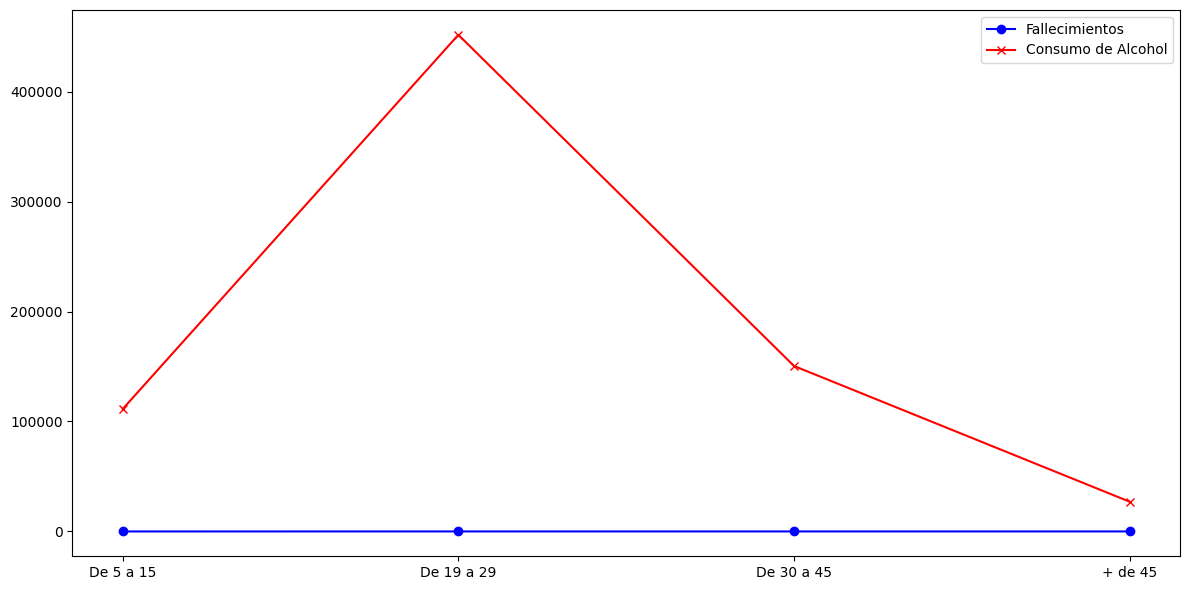


Opciones:
1. Graficar barras
2. Graficar línea
3. Salir
Selecciona una opción: 1


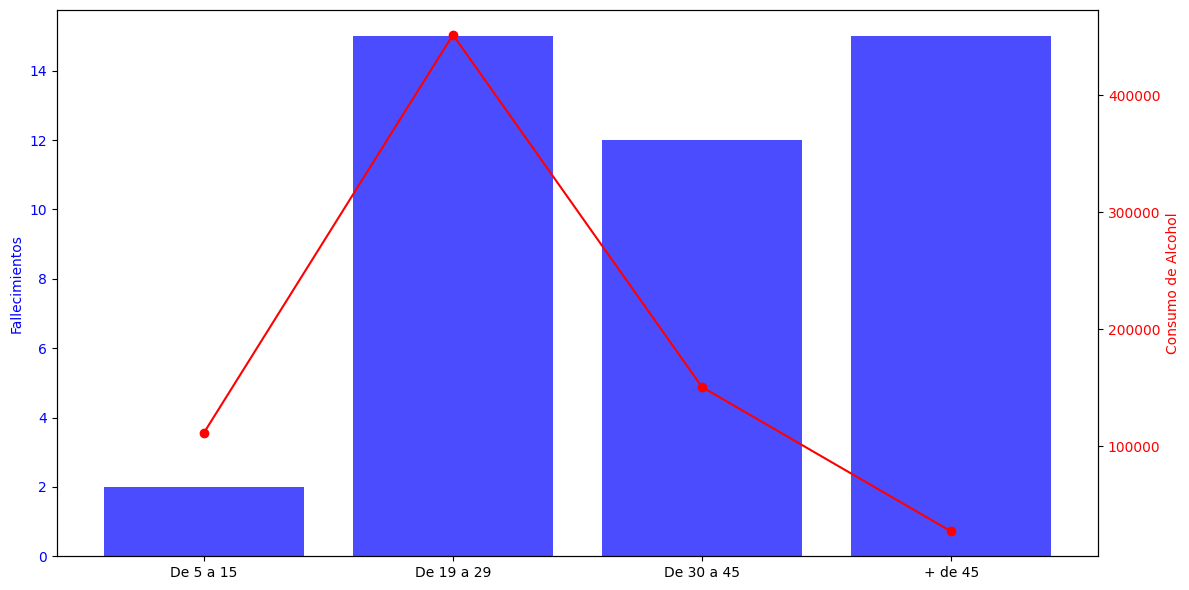


Opciones:
1. Graficar barras
2. Graficar línea
3. Salir
Selecciona una opción: 3


In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd  # Para manejar y analizar datos en forma de DataFrame
import matplotlib.pyplot as plt  # Para generar gráficos y visualizaciones
from scipy.stats import pearsonr  # Para calcular la correlación de Pearson

# Función para cargar los archivos desde el ordenador
def cargar_archivos():
    from google.colab import files  # Importamos la función para subir archivos en Google Colab
    print("Sube el archivo de consumo de alcohol:")  # Solicita el archivo correspondiente al consumo de alcohol
    alcohol_file = files.upload()  # Subimos el archivo y lo almacenamos

    print("Sube el archivo de accidentes de tráfico:")  # Solicita el archivo correspondiente a los accidentes de tráfico
    trafico_file = files.upload()  # Subimos el archivo y lo almacenamos

    # Leer los archivos cargados en formato CSV; se detecta el separador automáticamente
    alcohol_data = pd.read_csv(list(alcohol_file.keys())[0], sep=None, engine='python')
    trafico_data = pd.read_csv(list(trafico_file.keys())[0], sep=None, engine='python')
    return alcohol_data, trafico_data  # Devuelve ambos DataFrames

# Cargar los archivos de datos desde la función definida
alcohol_data, trafico_data = cargar_archivos()

# Seleccionar y estandarizar columnas relevantes
col_rango_edad = [col for col in trafico_data.columns if 'edad' in col.lower() or 'rango' in col.lower()]  # Busca columnas que contengan información de rango de edad
col_fallecimientos = [col for col in trafico_data.columns if 'total' in col.lower() or 'fallecimientos' in col.lower()]  # Busca columnas relacionadas con fallecimientos

# Verificar que se encontraron columnas adecuadas, de lo contrario lanza un error
if not col_rango_edad or not col_fallecimientos:
    raise ValueError("No se encontraron columnas adecuadas en el dataset de tráfico.")

# Seleccionar las columnas identificadas y renombrarlas para consistencia
trafico_data = trafico_data[[col_rango_edad[0], col_fallecimientos[0]]]
trafico_data.columns = ['Rango_Edad', 'Fallecimientos']

# Seleccionar las columnas relevantes en el dataset de alcohol y renombrarlas
alcohol_data = alcohol_data[['ALCOHOL_CONSUMO_EDAD_INICIO#es', 'OBS_VALUE']]
alcohol_data.columns = ['Rango_Edad', 'Consumo_Alcohol']

# Función para estandarizar los rangos de edad
def estandarizar_rangos(edad):
    edad = str(edad).lower().strip()  # Convertir a minúsculas y eliminar espacios en blanco
    if '5 a 15' in edad or '1 a 14' in edad:  # Diferentes representaciones del rango 5 a 15 años
        return 'De 5 a 15'
    elif '16 a 18' in edad or '16-18' in edad:  # Diferentes representaciones del rango 16 a 18 años
        return 'De 16 a 18'
    elif '19 a 29' in edad or '15 a 29' in edad:  # Diferentes representaciones del rango 19 a 29 años
        return 'De 19 a 29'
    elif '30 a 45' in edad or '30 a 39' in edad or '40 a 44' in edad:  # Diferentes representaciones del rango 30 a 45 años
        return 'De 30 a 45'
    elif '45' in edad or '50' in edad or 'más de 45' in edad or '60' in edad:  # Representaciones de +45 años
        return '+ de 45'
    else:
        return None  # Si no coincide, retorna None

# Aplicar la estandarización de rangos de edad a ambos DataFrames
alcohol_data['Rango_Edad'] = alcohol_data['Rango_Edad'].apply(estandarizar_rangos)
trafico_data['Rango_Edad'] = trafico_data['Rango_Edad'].apply(estandarizar_rangos)

# Eliminar filas con valores nulos en la columna 'Rango_Edad'
alcohol_data = alcohol_data.dropna(subset=['Rango_Edad'])
trafico_data = trafico_data.dropna(subset=['Rango_Edad'])

# Excluir datos del rango de edad "De 16 a 18" ya que no se analizarán
alcohol_data = alcohol_data[alcohol_data['Rango_Edad'] != 'De 16 a 18']
trafico_data = trafico_data[trafico_data['Rango_Edad'] != 'De 16 a 18']

# Agrupar los datos por rango de edad y sumar los valores de cada grupo
alcohol_data = alcohol_data.groupby('Rango_Edad').sum().reset_index()
trafico_data = trafico_data.groupby('Rango_Edad').sum().reset_index()

# Unir ambos DataFrames en base a la columna 'Rango_Edad'
datos_combinados = pd.merge(alcohol_data, trafico_data, on='Rango_Edad', how='outer')

# Ordenar los datos por un orden lógico de rangos de edad
orden_rangos = ['De 5 a 15', 'De 19 a 29', 'De 30 a 45', '+ de 45']
datos_combinados['Rango_Edad'] = pd.Categorical(datos_combinados['Rango_Edad'], categories=orden_rangos, ordered=True)
datos_combinados = datos_combinados.sort_values('Rango_Edad')

# Calcular el total de accidentes y la proporción de fallecimientos por rango de edad
total_accidentes = datos_combinados['Fallecimientos'].sum()
datos_combinados['Proporción_Fallecimientos'] = datos_combinados['Fallecimientos'] / total_accidentes * 100

# Mostrar los datos combinados en consola
print("\nDatos combinados:")
print(datos_combinados)

# Calcular la correlación entre consumo de alcohol y fallecimientos
correlacion, p_valor = pearsonr(datos_combinados['Consumo_Alcohol'], datos_combinados['Fallecimientos'])
print(f"\nCorrelación entre consumo de alcohol y fallecimientos: {correlacion:.2f} (p-valor: {p_valor:.3e})")

# Función para exportar los datos combinados a un archivo CSV
def exportar_datos(datos):
    datos.to_csv('datos_combinados.csv', index=False)  # Guardar el DataFrame en un archivo CSV
    print("\nDatos combinados exportados como 'datos_combinados.csv'.")

# Función para graficar los datos combinados
def graficar(datos, tipo='barras'):
    fig, ax1 = plt.subplots(figsize=(12, 6))  # Configurar el tamaño del gráfico
    if tipo == 'barras':  # Gráfico de barras
        ax1.bar(datos['Rango_Edad'], datos['Fallecimientos'], color='blue', alpha=0.7, label='Fallecimientos')
        ax1.set_ylabel('Fallecimientos', color='blue')  # Etiqueta del eje Y izquierdo
        ax1.tick_params(axis='y', labelcolor='blue')

        ax2 = ax1.twinx()  # Segundo eje Y para el consumo de alcohol
        ax2.plot(datos['Rango_Edad'], datos['Consumo_Alcohol'], color='red', marker='o', label='Consumo de Alcohol')
        ax2.set_ylabel('Consumo de Alcohol', color='red')  # Etiqueta del eje Y derecho
        ax2.tick_params(axis='y', labelcolor='red')
    elif tipo == 'linea':  # Gráfico de líneas
        plt.plot(datos['Rango_Edad'], datos['Fallecimientos'], label='Fallecimientos', color='blue', marker='o')
        plt.plot(datos['Rango_Edad'], datos['Consumo_Alcohol'], label='Consumo de Alcohol', color='red', marker='x')
        plt.legend()  # Mostrar la leyenda del gráfico
    else:  # Manejo de tipos no soportados
        print("Tipo de gráfico no soportado.")
    plt.tight_layout()  # Ajustar automáticamente los márgenes del gráfico
    plt.show()  # Mostrar el gráfico

# Opciones interactivas para el usuario
while True:
    print("\nOpciones:")  # Opciones disponibles
    print("1. Graficar barras")
    print("2. Graficar línea")
    print("3. Salir")
    opcion = input("Selecciona una opción: ")  # Entrada del usuario

    if opcion == '1':  # Si elige graficar barras
        graficar(datos_combinados, tipo='barras')
    elif opcion == '2':  # Si elige graficar líneas
        graficar(datos_combinados, tipo='linea')
    elif opcion == '3':  # Si elige salir
        break
    else:  # Si introduce una opción inválida
        print("Opción inválida. Intenta de nuevo.")


## 5. Conclusiones de trabajo
Como se puede observar en los resultados del análisis, se identificaron varios patrones interesantes relacionados con el consumo de alcohol y las tasas de fallecimientos en accidentes de tráfico:

1. **Confirmación parcial de la primera hipótesis:**

El análisis estadístico mostró una correlación positiva moderada entre los niveles de consumo de alcohol en determinadas franjas etarias y el número de fallecimientos en accidentes de tráfico. Esto sugiere que el consumo de alcohol puede ser un factor influyente, aunque no el único determinante. Se puede ver en el porcentaje de fallecimientos en los rangos de eddad

2. **Validación de la hipótesis de la segunda hipótesis:**  

Los datos reflejan que el grupo etario de jóvenes adultos (19-29 años) tiene un patrón consistente de mayor consumo de alcohol y también registra un porcentaje más alto de fallecimientos por accidentes de tráfico. Esto respalda la idea de que los jóvenes adultos son un grupo vulnerable, probablemente debido a su combinación de conductas de riesgo y mayores tasas de consumo.

3. **Confirmación parcial de la tercera hipótesis:**

En el grupo de adultos mayores (+45 años), se observó que, si bien el consumo de alcohol es menor comparado con los jóvenes, el número de fallecimientos por accidentes de tráfico sigue siendo significativo. Este hallazgo respalda la hipótesis de que otros factores, como condiciones físicas relacionadas con la edad (visión reducida, reflejos más lentos), podrían estar contribuyendo a los accidentes.


## 6. Opinión sobre los Datos Abiertos
Los datos abiertos son un recurso invaluable en el desarrollo de investigaciones como esta. La accesibilidad a datasets provenientes de fuentes confiables como datos.gob.es permite no solo analizar fenómenos de interés público, sino también fomentar la transparencia y la colaboración entre instituciones, ciudadanos e investigadores. En este caso, el análisis de la relación entre el consumo de alcohol y los accidentes de tráfico con víctimas mortales en Canarias no habría sido posible sin la disponibilidad de estos datos abiertos.

Considero que los datos abiertos promueven una cultura de innovación y participación ciudadana. Al estar disponibles para cualquier persona, permiten la creación de soluciones informadas y basadas en evidencia que pueden aplicarse para resolver problemas sociales, mejorar políticas públicas o incluso inspirar nuevos proyectos tecnológicos. Por ejemplo, en este trabajo, los resultados obtenidos podrían servir como base para campañas de concienciación o intervenciones dirigidas a reducir accidentes en grupos de riesgo específicos.

No obstante, la eficacia de los datos abiertos depende de su calidad, estandarización y accesibilidad. En ocasiones, los formatos de los datasets pueden dificultar su análisis, lo que resalta la necesidad de invertir en procesos de estandarización y en garantizar actualizaciones regulares. Además, la protección de datos personales debe ser una prioridad para evitar vulneraciones a la privacidad.